In [48]:
import numpy as np
import math
import scipy.integrate as integrate
import matplotlib.pyplot as pyplot

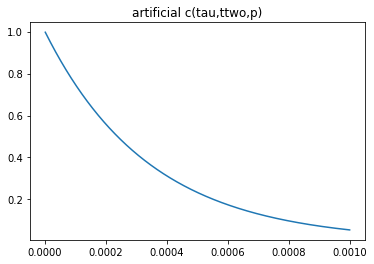

In [49]:
def artificial_c(t, ttwo = 343.43e-6, p=1): 
    return math.e**((-t/ttwo)**p);



t_test_vals = np.linspace(1e-6,1e-3,5000);
pyplot.title("artificial c(tau,ttwo,p)");
pyplot.plot(t_test_vals,artificial_c(t_test_vals))



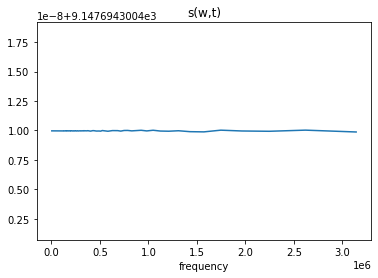

In [50]:
def s(t): 
    return -math.pi*np.log(artificial_c(t))/t, math.pi/t;

pyplot.title("s(w,t)");
pyplot.xlabel("frequency")
pyplot.plot(s(t_test_vals)[1],s(t_test_vals)[0])


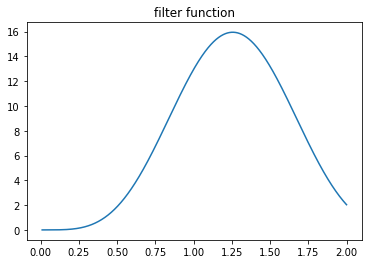

In [51]:


# define the filter function
def filter_function(w,t, tpi=100e-9):
    t1 = (t + tpi)/2; 
    
    return ( abs( 1 + np.exp(1j*w*t) - 2*np.exp(1j*w*t1)*np.cos(w*tpi/2) ) )**2

# plot the filter function

t = 5e-6;
w = np.linspace(0.01e6, 2e6, 5000); # rad/s
FF2 = filter_function(w,t)
pyplot.title("filter function");
pyplot.plot(w/1e6, FF2);

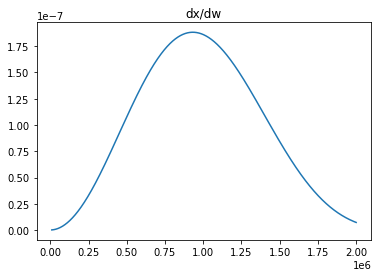

In [52]:

# dx is the dx/dw
def dx(w, t):

    filter_function_vals = filter_function(w,t);
    return 0.5*math.pi * s(t)[0] * filter_function_vals/ w**(2);


pyplot.title("dx/dw");
dx_vals = dx(w,t=t);
pyplot.plot(w,dx_vals);

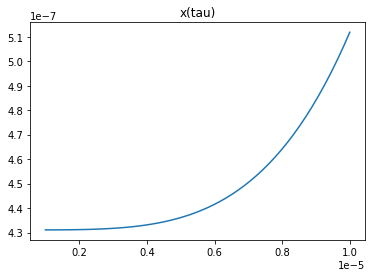

In [53]:

def x_quad(t):
    return integrate.quad(dx,0,math.inf,args=(t))[0];

def x_trapz(t):
    w = np.linspace(0.00001,3000,10000);
    dx_vals = dx(w,t);
    return integrate.trapz(dx_vals, w);

def x(t):
    return x_trapz(t);


x_vals = [];
t_range = np.linspace(1e-6,1e-5);
for t in t_range:
    x_vals.append(x(t));

pyplot.title("x(tau)");
pyplot.plot(t_range,x_vals);

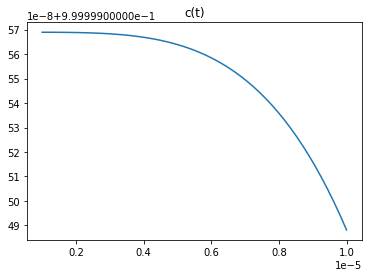

In [54]:

def c(t):
    return math.exp(-x(t));


c_vals = [];
for t in t_range:
    c_vals.append(c(t));
pyplot.title("c(t)");
pyplot.plot(t_range,c_vals);
